In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from function_notebook_1 import *

In [3]:
#training data 2012 - 2018
df1 = pd.read_csv('../data/postseason12.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df2 = pd.read_csv('../data/postseason13.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df3 = pd.read_csv('../data/postseason14.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df4 = pd.read_csv('../data/postseason15.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df5 = pd.read_csv('../data/postseason16.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df6 = pd.read_csv('../data/postseason17.csv').drop(['Unnamed: 0','w_loc'], axis = 1)

df = pd.concat([df1, df2, df3, df4, df5, df6])
df['w_loc_H'] = 0
df['w_loc_N'] = 1

#testing data 2019
dftest = pd.read_csv('../data/postseason18.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
dftest['w_loc_H'] = 0
dftest['w_loc_N'] = 1

In [4]:
#train_test_split
X_train=df.drop('fav_win',axis=1)
X_test=dftest.drop('fav_win',axis=1)
y_train=df['fav_win']
y_test = dftest['fav_win']

X_train.shape, X_test.shape

((402, 108), (67, 108))

In [5]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [6]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [7]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.8086111111111111
Train Mean Accuracy: 0.8233830845771144
Test Mean Accuracy: 0.8208955223880597
Recall Score: 0.8913043478260869
Precision Score: 0.8541666666666666
F1 Score: 0.8723404255319149


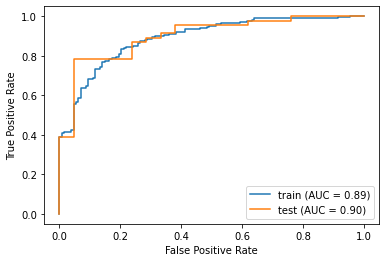

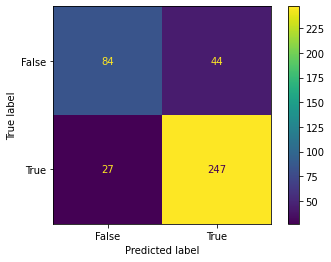

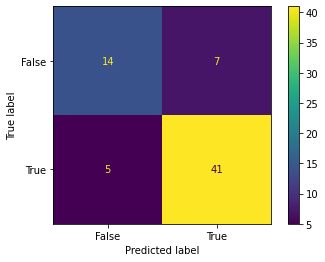

In [8]:
logreg(X_train_best_log, X_test_best_log, y_train, y_test)

### KNN

In [9]:
#knn(X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree

In [10]:
#dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [11]:
#X_train_best_dtree=X_train[dtree_feats]
#X_test_best_dtree=X_test[dtree_feats]

In [12]:
#dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [13]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

Number of Trees: 500
Criterion: entropy
Mean Cross-Val Score: 0.7537345679012345
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.7611940298507462
Recall Score: 1.0
Precision Score: 0.7419354838709677
F1 score: 0.8518518518518519


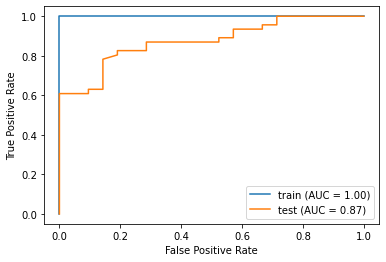

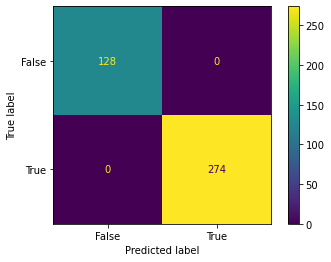

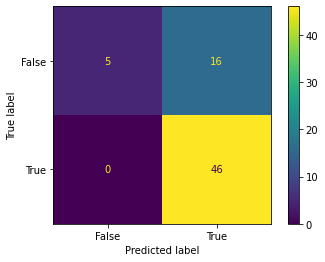

In [14]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

### Bagging Classifier

In [15]:
#bagged(X_train, X_test, y_train, y_test, cv=5)

### XGboost

XGBoost Learning Rate: 0.01
XGBoost Max Depth: 4
XGBoost Min Child Weight: 3
XGBoost Subsample: 1
XGBoost Estimators: 500
Mean Cross-Val Score: 0.7586111111111111
Train Mean Accuracy Score: 0.9950248756218906
Test Mean Accuracy Score: 0.7313432835820896
Recall Score: 0.9565217391304348
Precision Score: 0.7333333333333333
F1 score: 0.8301886792452831


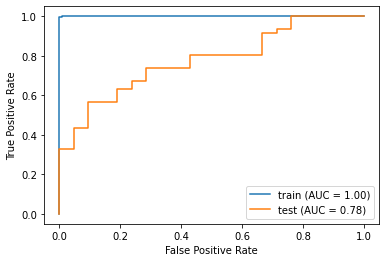

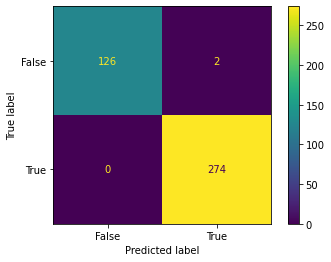

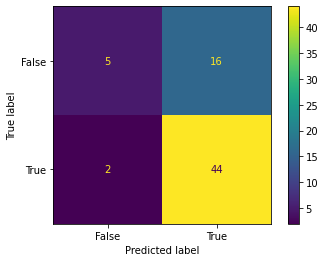

In [16]:
xgboost(X_train, X_test, y_train, y_test, cv=5)